# 导入相关数据并对数据进行预处理

## 导入数据

In [10]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import swifter

sns.set(style='darkgrid', font='SimHei', rc={'axes.unicode_minus':False}) # 设置字体和解决负号无法显示问题
mpl.rcParams["font.family"] = 'SimHei'  # 设置 mpl 字体，以便于显示中文
mpl.rcParams["axes.unicode_minus"] = False # 解决  mpl 无法显示负号问题

warnings.filterwarnings("ignore")   # Insert an entry into the list of warnings filters (at the front).

rawData = pd.read_csv('20191017_airQuality.csv')
print(rawData.shape)
rawData.head()

(325, 12)


,City,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48


## 数据预处理

### 缺失值

In [11]:
# 查看缺失值

# The Frist Way
rawData.info()
# 结果显示 Precipitation 列有 4 个缺失值

# The Second Way
# 直接找到缺失值所在位置
# rawData[rawData.isnull().any(axis=1)].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
City                       325 non-null object
AQI                        325 non-null int64
Precipitation              321 non-null float64
GDP                        325 non-null float64
Temperature                325 non-null float64
Longitude                  325 non-null float64
Latitude                   325 non-null float64
Altitude                   325 non-null float64
PopulationDensity          325 non-null int64
Coastal                    325 non-null int64
GreenCoverageRate          325 non-null float64
Incineration(10,000ton)    325 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 30.6+ KB


In [12]:
# 处理缺失值
# 1、删除所在行的数据
# 2、使用均值填充
# 3、使用中值填充
# 4、使用均值或中值填充
# 5、暂留再做研究

# print(rawData["Precipitation"].skew())
# 返回经过N-1规范化的请求轴的无偏倾斜。
# 如果得到的值大于 0，则数据右偏
# 如果得到的值小于 0，则数据左偏
# 偏哪边，则哪边的数据较少

# sns.distplot(rawData["Precipitation"].dropna())

# 根据上面所得结果，使用中值填充缺失值
rawData.fillna({"Precipitation":rawData["Precipitation"].median()}, inplace=True)

### 重复值

In [13]:
# 查找重复值

# The First Way
rawData[rawData.duplicated()]
# rawData[rawData['City'] == 'Taizhou City']

# The Second Way
# rawData2 = pd.concat(g for _, g in rawData.groupby(rawData.City) if len(g) > 1)
# rawData2['movie_title'].sort_values(ascending=True)

# 删除重复值
rawData.drop_duplicates(inplace=True)

### 异常值

#### 发现异常值 - 01

In [14]:
# 使用 describe()
rawData.describe()
# 对于这种陌生数据，使用 describe() 基本用处不大，除非数据异常特别明显

,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,75.334365,1081.707430,2394.094241,15.989429,113.985779,31.843767,382.250464,2596.560372,0.247678,38.383096,52.418390
std,42.995735,584.468915,3263.974279,5.029369,7.711894,6.099390,743.219135,2913.835552,0.432334,6.321973,91.976476
min,12.000000,56.100000,22.500000,-2.500000,80.105800,18.234043,-12.000000,1.000000,0.000000,7.600000,1.530000
25%,45.000000,581.000000,761.685000,13.750000,111.060575,27.664188,18.000000,714.000000,0.000000,36.000000,18.875000
50%,69.000000,920.000000,1328.520000,16.515068,115.500183,31.340637,62.000000,1787.000000,0.000000,38.690000,24.000000
75%,102.000000,1651.250000,2722.180000,18.928767,119.867274,36.419417,354.500000,3509.000000,0.000000,42.675000,37.630000
max,296.000000,2478.100000,24964.990000,27.447945,129.598496,49.220000,4505.000000,25900.000000,1.000000,76.490000,686.670000


#### 发现异常值 - 02

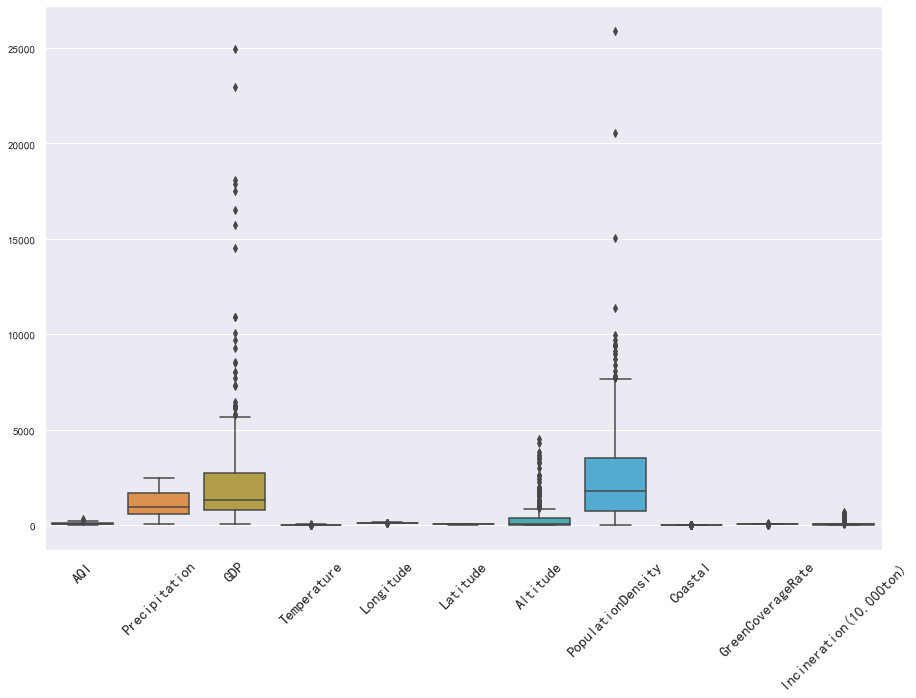

In [15]:
# 使用箱型图
plt.figure(figsize=(15,10))
plt.xticks(rotation=45, fontsize=15)
sns.boxplot(data=rawData)

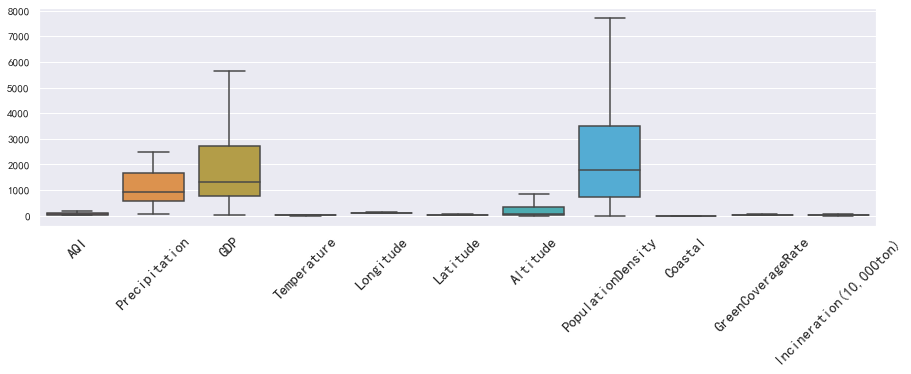

In [16]:
t = rawData.copy()

for k in t:
    if pd.api.types.is_numeric_dtype(t[k]):
        o = t[k].describe()
        IQR = o["75%"] - o["25%"]
        lower = o["25%"] - 1.5 * IQR
        upper = o["75%"] + 1.5 * IQR
        t[k][t[k] < lower] = lower
        t[k][t[k] > upper] = upper
# IQR: interquartile range, IQR，四分位数
# 值为第三四分位数和第一四分位数的差值
# 参考链接：[Interquartile range - Wikipedia](https://en.wikipedia.org/wiki/Interquartile_range)
        
plt.figure(figsize=(15,4))
plt.xticks(rotation=45, fontsize=15)
sns.boxplot(data=t)

### 数据类型转换

None.

### 设置索引

None.

# 分析数据

## 哪些城市的空气质量较好/较差？

### 最好的 5 个城市

,City,AQI
204,Shaoguan City,12
163,Nanping City,12
154,Meizhou City,12
91,Keelung City,13
195,Sanming City,13


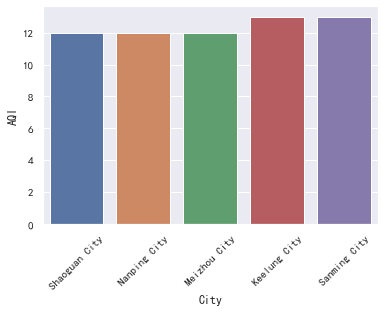

In [17]:
cityTop5 = rawData[['City', 'AQI']].sort_values("AQI")
display(cityTop5.iloc[:5])

plt.xticks(rotation=45)
sns.barplot(x="City", y="AQI", data=cityTop5.iloc[:5])

### 最差的 5 个城市

,City,AQI
105,Jiaozuo City,199
112,Jinzhou City,202
13,Baoding City,220
26,Chaoyang City,224
16,Beijing City,296


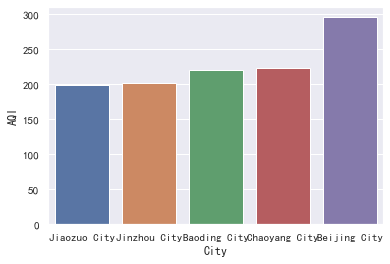

In [18]:
cityTail5 = rawData[['City', 'AQI']].sort_values("AQI")
display(cityTail5.iloc[-5:])

# plt.xticks(rotation=45)
sns.barplot(x="City", y="AQI", data=cityTail5.iloc[-5:])

## 空气质量在地理位置分布上，是否有一定的规律性？

根据[中国空气质量指数 - 维基百科，自由的百科全书](https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%9C%8B%E7%A9%BA%E6%B0%A3%E5%93%81%E8%B3%AA%E6%8C%87%E6%95%B8)资料，空气质量等级划分如下：
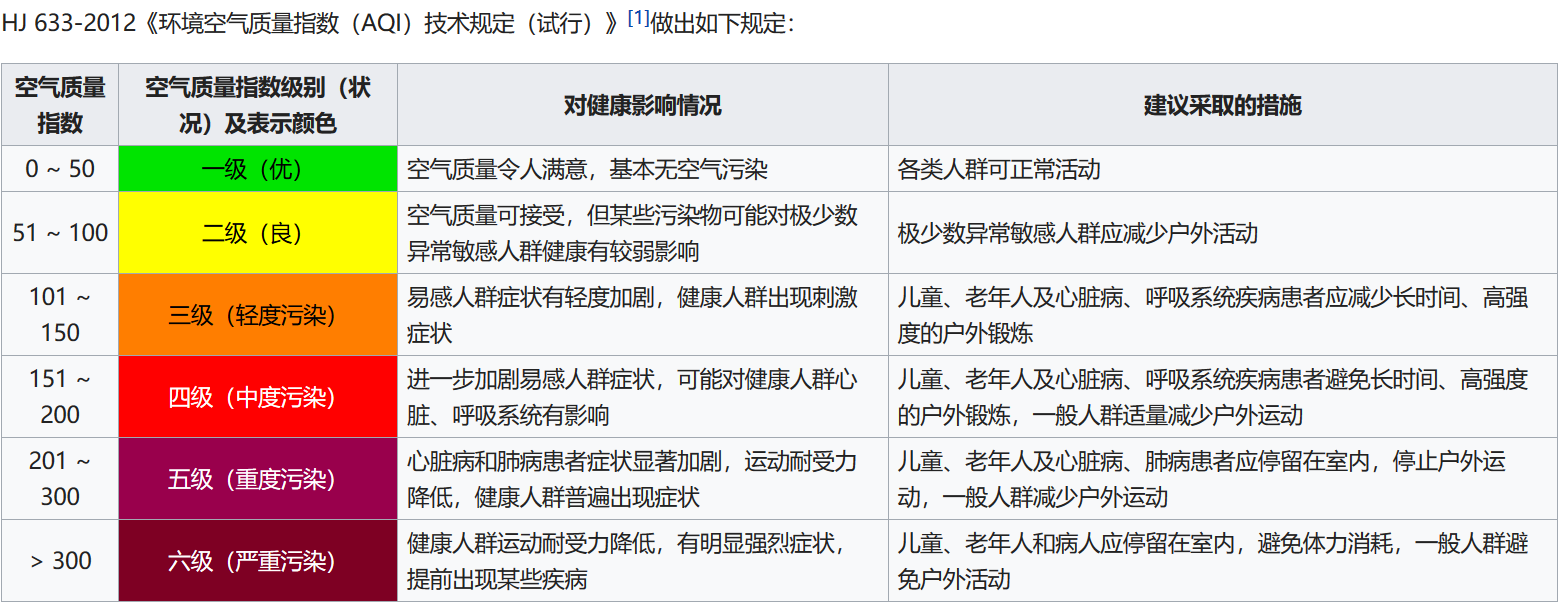

由此来统计数据中的空气质量等级。

In [19]:
def AQIToLevel(AQI):
    if AQI >= 0 and AQI <= 50:
        return "一级"
    elif AQI >= 51 and AQI <= 100:
        return "二级"
    elif AQI >= 101 and AQI <= 150:
        return "三级"
    elif AQI >= 151 and AQI <= 200:
        return "四级"
    elif AQI >= 201 and AQI <= 300:
        return "五级"
    elif AQI >= 300:
        return "六级"

### 城市空气质量等级统计

二级    136
一级    103
三级     66
四级     14
五级      4
Name: AQI, dtype: int64

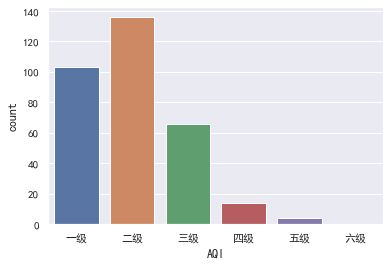

In [20]:
level = rawData["AQI"].swifter.apply(AQIToLevel)
# level = rawData["AQI"].apply(AQIToLevel)

display(level.value_counts())
sns.countplot(x=level, order=["一级","二级","三级","四级","五级","六级"])

### 空气质量指数分布

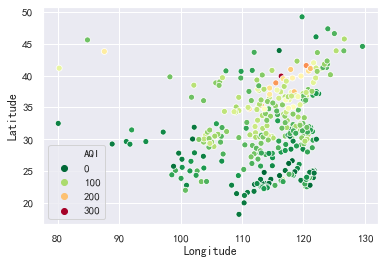

In [21]:
# print(sns.__version__)
# print(mpl.__version__)
sns.scatterplot(x="Longitude", y="Latitude", hue="AQI", palette=plt.cm.RdYlGn_r, data=rawData)

## 关于空气质量的验证

### 中心极限理论

总体：

    μ：均值
    σ2：方差
    
样本：

    n：样本容量

样本均值： 30.883024532830817
样本标准差： 9.786105893753238
偏度： 0.04614797515440677


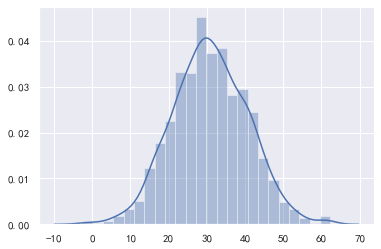

In [22]:
all_ = np.random.normal(loc=30, scale=80, size=10000)

mean_arr = np.zeros(1000)

for i in range(len(mean_arr)):
        mean_arr[i] = np.random.choice(all_, size=64, replace=False).mean()
    
print("样本均值：", mean_arr.mean())
print("样本标准差：", mean_arr.std())
print("偏度：", pd.Series(mean_arr).skew())

sns.distplot(mean_arr)

### 置信区间

In [23]:
scale = 50

x = np.random.normal(0, scale, size=100000)

for times in range(1, 4):
    y = x[(x >= -times * scale) & (x <= times * scale)]
    print(f"{times}倍标准差：")
    print(f"{len(y) * 100 / len(x)}%")

1倍标准差：
68.124%
2倍标准差：
95.408%
3倍标准差：
99.713%


根据中心极限定理，如果多次抽样，则样本均值构成正态分布。

如果对总体进行一次抽样，则本次抽样个体的均值有 95% 的概率会在二倍标准差内，仅有 5% 的概率会在二倍标准差外。

根据小概率事件，如果抽样的个体值落在二倍标准差之外，则可认为本次抽样来源的总体，其均值并非是期望均值。

### 假设检验 - t 检验

In [24]:
from scipy import stats

# print(scipy.__version__)

r = stats.ttest_1samp(rawData["AQI"], 72)
print("t 值：", r.statistic)
print("p 值：", r.pvalue)

t 值： 1.393763441074581
p 值： 0.16435019471704654


此时， P 值大于 0.05 ，故在显著度水平为 0.05 的情况下，无法拒绝原假设，因此接受原假设。

下面计算全国所有城市平均空气质量指数的置信区间。

In [25]:
n = len(rawData)
df = n - 1
left = stats.t.ppf(0.025, df=df)
right = stats.t.ppf(0.975, df=df)

print(left, right)

mean = rawData["AQI"].mean()
std = rawData["AQI"].std()

mean + left * (std / np.sqrt(n)), mean + right * (std / np.sqrt(n))

-1.9673585853224684 1.967358585322468


(70.6277615675309, 80.0409690826239)

## 临海城市的空气质量是否高于内陆城市？

0    243
1     80
Name: Coastal, dtype: int64

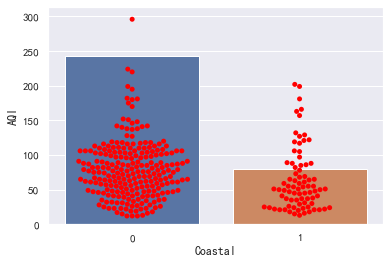

In [29]:
# 临海城市和内陆城市的数量分布
display(rawData["Coastal"].value_counts())
sns.countplot(x="Coastal", data=rawData)
sns.swarmplot(x="Coastal", y="AQI", data=rawData, color="red")

Coastal
0    79.045267
1    64.062500
Name: AQI, dtype: float64

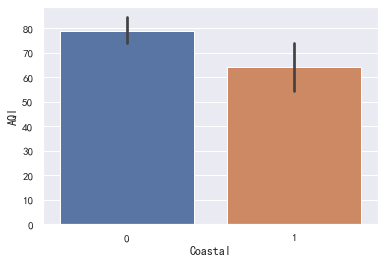

In [31]:
# 临海城市和内陆城市的空气质量均值
display(rawData.groupby("Coastal")["AQI"].mean())
sns.barplot(x="Coastal", y="AQI", data=rawData)

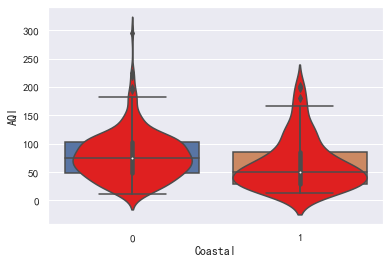

In [35]:
sns.boxplot(x="Coastal", y="AQI", data=rawData)

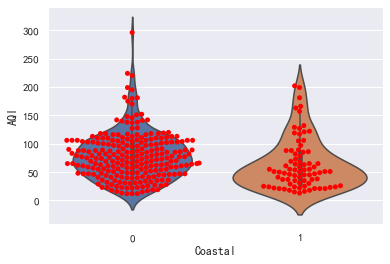

In [37]:
sns.violinplot(x="Coastal", y="AQI", data=rawData)
sns.swarmplot(x="Coastal", y="AQI", data=rawData, color="red")

In [41]:
# 方差齐性检验
coastal = rawData[rawData["Coastal"] == 1]["AQI"]
inland = rawData[rawData["Coastal"] == 0]["AQI"]

stats.levene(coastal, inland)

# t 检验
stats.ttest_ind(coastal, inland, equal_var=True)

Ttest_indResult(statistic=-2.7303827520948905, pvalue=0.006675422541012958)

## 空气质量主要受哪些因素影响？

## 全国城市空气质量普遍处于何种水平？

### 使用散点图矩阵

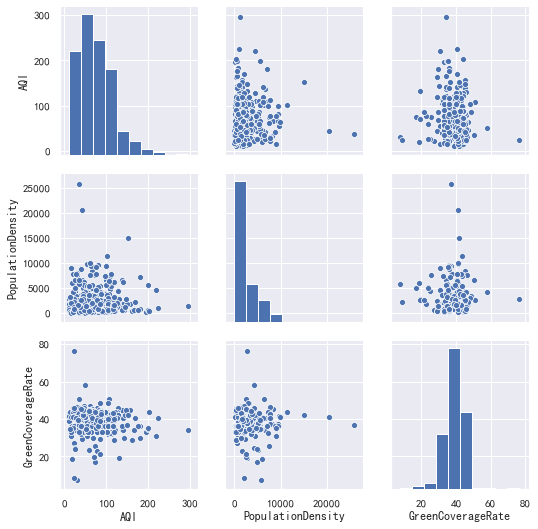

In [43]:
#查看空气质量与人口密度、绿化率之间的关系
sns.pairplot(rawData[["AQI", "PopulationDensity", "GreenCoverageRate"]])

### 使用相关系数

In [44]:
# 使用 corr() 方法
rawData.corr()

,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
AQI,1.000000,-0.401844,0.160341,-0.283956,0.093900,0.552652,-0.204753,-0.026496,-0.150656,-0.097734,0.106898
Precipitation,-0.401844,1.000000,0.176665,0.685447,0.223211,-0.656175,-0.324124,0.067047,0.259783,0.153291,0.201174
GDP,0.160341,0.176665,1.000000,0.145780,0.173041,-0.010124,-0.208952,0.229402,0.174241,-0.039220,0.899550
Temperature,-0.283956,0.685447,0.145780,1.000000,0.141277,-0.807119,-0.459426,0.144923,0.305894,0.216575,0.173590
Longitude,0.093900,0.223211,0.173041,0.141277,1.000000,0.173585,-0.737548,-0.121986,0.374889,0.156439,0.072068
Latitude,0.552652,-0.656175,-0.010124,-0.807119,0.173585,1.000000,0.002571,-0.167384,-0.204199,-0.142776,-0.081412
Altitude,-0.204753,-0.324124,-0.208952,-0.459426,-0.737548,0.002571,1.000000,-0.031408,-0.271570,-0.182449,-0.122192
PopulationDensity,-0.026496,0.067047,0.229402,0.144923,-0.121986,-0.167384,-0.031408,1.000000,-0.034158,0.021197,0.283563
Coastal,-0.150656,0.259783,0.174241,0.305894,0.374889,-0.204199,-0.271570,-0.034158,1.000000,0.264419,0.158850
GreenCoverageRate,-0.097734,0.153291,-0.039220,0.216575,0.156439,-0.142776,-0.182449,0.021197,0.264419,1.000000,-0.029088


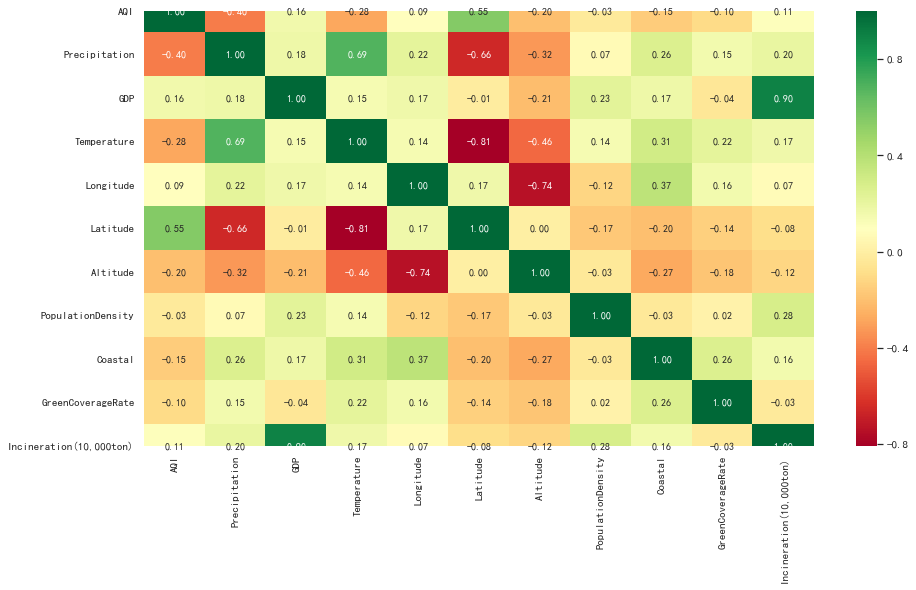

In [48]:
# 使用热力图
plt.figure(figsize=(15, 8))
sns.heatmap(rawData.corr(), cmap=plt.cm.RdYlGn, annot=True, fmt=".2f")
# cmap: matplotlib colormap name
# annot: If True, write the data value in each cell. If an array-like with the same shape as ``data``, then use this to annotate the heatmap instead of the raw data.
# fmt: String formatting code to use when adding annotations.

## 如何预测一个城市的空气质量？

使用各种算法。